In [1]:
import pandas as pd
import seaborn as sns

#  Overcoming pitfalls: string issues

Being able to effectively use categorical pandas Series is an important skill to have in your toolbelt. Unfortunately, there are several common problems that you may run into when using these Series.

In this exercise, you will work through code from a previous exercise on updating a categorical Series. Follow the instructions to make sure everything goes smoothly. The used cars dataset, used_cars, is loaded for you
1. Print the frequency table of the "body_type" column for used_cars and include NaN
1. Update the .loc statement so that all NaN values in "body_type" are set to "other".
1. Convert the "body_type" column to title case.
1. Check the dtype of the "body_type" column.
.

values.

In [2]:
used_cars = pd.read_csv("/kaggle/input/used-cars-prices-in-uk/used_cars_UK.csv")
used_cars.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [3]:
# Print the frequency table of body_type and include NaN values
print(used_cars["Body type"].value_counts(dropna=False))

# Update NaN values
used_cars.loc[used_cars["Body type"].isna(), "Body type"] = "other"

# Convert body_type to title case
used_cars["Body type"] = used_cars["Body type"].str.title()

# Check the dtype
print(used_cars["Body type"].dtype)

Body type
Hatchback      2279
SUV             460
Saloon          368
Estate          171
MPV             153
Coupe           139
Convertible     109
Pickup            3
Combi Van         2
Minibus           1
Name: count, dtype: int64
object


Excellent work! Categorical Series can be tricky. When in doubt, check the changes you have made and convert back to a categorical Series if needed. In this example you made 3 changes and the last one converted the Series to an object. This required you to convert it back to categorical before continuing.

# Overcoming pitfalls: using NumPy arrays

A local used car company manually appraises each car that they add to their inventory. When a new car comes in, they select from a drop-down menu, giving the car a rating between 1 and 5. A 1 means that the car probably won't sell as is, but a 5 indicates the car will definitely sell without a problem.

With over 38,000 cars in their inventory, the company has asked you to give them an average "sellability" of their cars. For this exercise, use the used_cars dataset. The column of interest is called "Sale Rating" and it is currently a categorical colum

* Print the frequency table of the "Sale Rating" column of the used_cars dataset.
* A type error, because numpy doesn't understand the categorical dtype.
* Correct the second statement by converting the column to type int before calling .mean().
mean().

In [4]:
# Print the frequency table of Sale Rating
print(used_cars["Price"].value_counts())

# Find the average score
average_score = used_cars["Price"].astype(int).mean()

# Print the average
print(average_score)

Price
2495    128
2995    114
1995     71
3995     63
3495     56
       ... 
6390      1
7970      1
2550      1
2445      1
1745      1
Name: count, Length: 866, dtype: int64
5787.145725915875


# Create a label encoding and map

A used car company believes that they can predict a car's sales price reasonably well using their used_cars dataset. One of the variables they want to use, "color", needs to be converted to codes. The company believes that a car's color will be important when predicting sales price.5
* Convert the color column to a categorical Series.
* Create a new column, "color_code", by creating a label encoding for the variable "color".
* Before you forget which codes belong to which categories, create a color map using the codes and categories objects.
* Print the new color map to see which codes map to which categories.
egories.

In [5]:
# Convert to categorical and print the frequency table
used_cars["Engine"] = used_cars["Engine"].astype("category")
print(used_cars["Engine"].value_counts())



Engine
1.6L    734
2.0L    553
1.2L    521
1.4L    421
1.0L    326
1.5L    294
1.3L    170
1.8L    158
3.0L     79
2.2L     75
2.1L     63
1.1L     39
1.7L     35
2.5L     33
1.9L     31
2.4L     28
0.9L     15
2.7L     11
3.5L     10
3.2L      7
4.4L      5
3.7L      5
2.3L      4
2.6L      4
4.2L      4
2.8L      3
5.0L      3
4.3L      2
0.8L      2
3.3L      1
4.8L      1
3.1L      1
5.5L      1
6.3L      1
Name: count, dtype: int64


In [6]:
# Create a label encoding
used_cars["Engine_type"] = used_cars["Engine"].cat.codes

# Create codes and categories objects
codes = used_cars["Engine"].cat.codes
categories = used_cars["Engine"]
color_map = dict(zip(codes, categories))

# Print the map
print(color_map)

{6: '1.4L', 4: '1.2L', 5: '1.3L', 12: '2.0L', 8: '1.6L', 15: '2.3L', 10: '1.8L', 2: '1.0L', 21: '3.0L', 7: '1.5L', 11: '1.9L', 16: '2.4L', 14: '2.2L', 25: '3.5L', 23: '3.2L', 17: '2.5L', 3: '1.1L', 22: '3.1L', 26: '3.7L', 18: '2.6L', 13: '2.1L', 20: '2.8L', 31: '5.0L', 0: '0.8L', 19: '2.7L', 9: '1.7L', 1: '0.9L', 27: '4.2L', -1: nan, 29: '4.4L', 28: '4.3L', 24: '3.3L', 32: '5.5L', 30: '4.8L', 33: '6.3L'}


! You successfully created a label encoding for the color column. Creating an encoding like this can save on memory and improve performance. Reading and writing files that use codes instead of strings can save a lot of time.

# Using saved mappings

You are using a subset of a dataset and have been asked to create visualizations summarizing the output. As the dataset currently stands, all you see are numbers! Luckily, you had created and saved dictionaries (color_map, fuel_map, and transmission_map) that will map these columns back to their original categorical names. The dataset used_cars_updated has been preloaded. A preview of the dataset is shown. Check out the console to view the column data types.

       engine_fuel  color  transmission  price_usd
0                3      8             0   10900.00
1                3      1             0    5000.00
2                3      7             0    28
* Update the "color" column back to its original values using the color_map dictionary.
* Update the "engine_fuel" column back to its original values using the fuel_map dictionary.
* Update the "transmission" column back to its original values using the transmission_map dictionary.
* Use .info() on the dataset to see if the dtypes have changed.
ave changed.

In [7]:
import pandas as pd
import numpy as np

# Define the mapping dictionaries
fuel_map = {0: 'Petrol', 1: 'Diesel', 2: 'Electric', 3: 'Hybrid'}
color_map = {0: 'Red', 1: 'Blue', 2: 'Green', 3: 'Black', 4: 'White', 5: 'Gray', 6: 'Silver', 7: 'Yellow', 8: 'Orange'}
transmission_map = {0: 'Manual', 1: 'Automatic'}

# Generate random data
np.random.seed(42)  # For reproducibility
data = {
    'engine_fuel': np.random.randint(0, 4, 50),  # Random fuel types
    'color': np.random.randint(0, 9, 50),        # Random colors
    'transmission': np.random.randint(0, 2, 50), # Random transmissions
    'price_usd': np.random.uniform(2000, 30000, 50).round(2)  # Random prices
}

# Create DataFrame
used_cars_updated = pd.DataFrame(data)
# used_cars_updated.astype("category")

# Preview the DataFrame
used_cars_updated.head()


,engine_fuel,color,transmission,price_usd
0,2,2,0,3132.14
1,3,6,1,21898.56
2,0,3,1,5104.94
3,2,8,1,14301.42
4,2,2,0,7648.14


In [8]:
# Convert the DataFrame columns to category dtype
used_cars_updated = pd.DataFrame(data)
used_cars_updated = used_cars_updated.astype({
    'engine_fuel': 'category',
    'color': 'category',
    'transmission': 'category'
})

# Check the data types of each column
used_cars_updated.dtypes


engine_fuel     category
color           category
transmission    category
price_usd        float64
dtype: object

In [9]:
# Update the color column using the color_map
used_cars_updated["color"] = used_cars_updated["color"].map(color_map)
# Update the engine fuel column using the fuel_map
used_cars_updated["engine_fuel"] = used_cars_updated["engine_fuel"].map(fuel_map)
# Update the transmission column using the transmission_map
used_cars_updated["transmission"] = used_cars_updated["transmission"].map(transmission_map)
# Print the info statement
print(used_cars_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   engine_fuel   50 non-null     category
 1   color         50 non-null     category
 2   transmission  50 non-null     category
 3   price_usd     50 non-null     float64 
dtypes: category(3), float64(1)
memory usage: 1.3 KB
None


 When you start making visualizations it will be really helpful to have the actual values and not the just the codes. Also notice that the categorical dtype was preserved when we mapped the integers back to their original values. In this case, we don't need to convert each column back to a categorical Series.

# Creating a Boolean encoding

In preparation for running machine learning models to estimate the sale price of used cars, you are starting to analyze the available columns of the used_cars dataset and want to create columns that can be used in training. One of the managers of a used car dealership has said that the manufacturer of the car is the most important aspect he considers when setting prices. You will begin by exploring the manufacturer_name column.5
* Print the frequency table of the "manufacturer_name" column.
* Create a column, "is_volkswagen", that is True when "manufacturer_name" contains "Volkswagen" and False otherwise.
* Update the code so that a 1 is used instead of True and a 0 is used instead of False so Python can use this column in algorithms.
* Print out a frequency table for the newly created column.
lumn.

In [10]:
# Print the "manufacturer_name" frequency table.
print(used_cars["title"].value_counts())



title
Vauxhall Corsa         223
Ford Focus             162
Vauxhall Astra         155
Ford Fiesta            128
BMW 3 Series           109
                      ... 
DS Automobiles DS 9      1
Lexus SC 430             1
Mazda MX-30              1
Mercedes-Benz CL         1
Honda Prelude            1
Name: count, Length: 469, dtype: int64


In [11]:
# Create a Boolean column for the most common manufacturer name
used_cars["is_Hyundai i30"] = np.where(
  used_cars["title"].str.contains("Hyundai i30", regex=False), 1, 0
)
  
# Check the final frequency table
print(used_cars["is_Hyundai i30"].value_counts())

is_Hyundai i30
0    3664
1      21
Name: count, dtype: int64


A lot of methods in Python will return True/False values as 0s and 1s. For consistency, sometimes you may want to save the column with actualy True and False values, while sometimes you might want to use 0s and 1s.

# One-hot encoding specific columns

A local used car dealership wants your help in predicting the sale price of their vehicles. If you use one-hot encoding on the entire used_cars dataset, the new dataset has over 1,200 columns. You are worried that this might lead to problems when training your machine learning models to predict price. You have decided to try a simpler approach and only use one-hot encoding on a few columns.



* Create a new dataset, used_cars_simple, with one-hot encoding for these columns: "manufacturer_name" and "transmission" (in this order).
* Set the prefix of all new columns to "dummy", so that you can easily filter to newly created columns.


In [12]:
used_cars.tail()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Engine_type,is_Hyundai i30
3680,4723,Renault Megane,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,8,0
3681,4724,Audi A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,12,0
3682,4725,BMW 3 Series,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,12,0
3683,4726,Honda Accord,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,14,0
3684,4727,Vauxhall Corsa,2000,82160,2013,7.0,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 5,NaN,4,0


In [15]:
# Create one-hot encoding for just two columns
used_cars_simple = pd.get_dummies(
  used_cars,
  # Specify the columns from the instructions
  columns=["title", "Registration_Year"],
  # Set the prefix
  prefix ="dummy"
)
print(used_cars.shape)
# Print the shape of the new dataset
print(used_cars_simple.shape)

(3685, 16)
(3685, 523)


lumns.
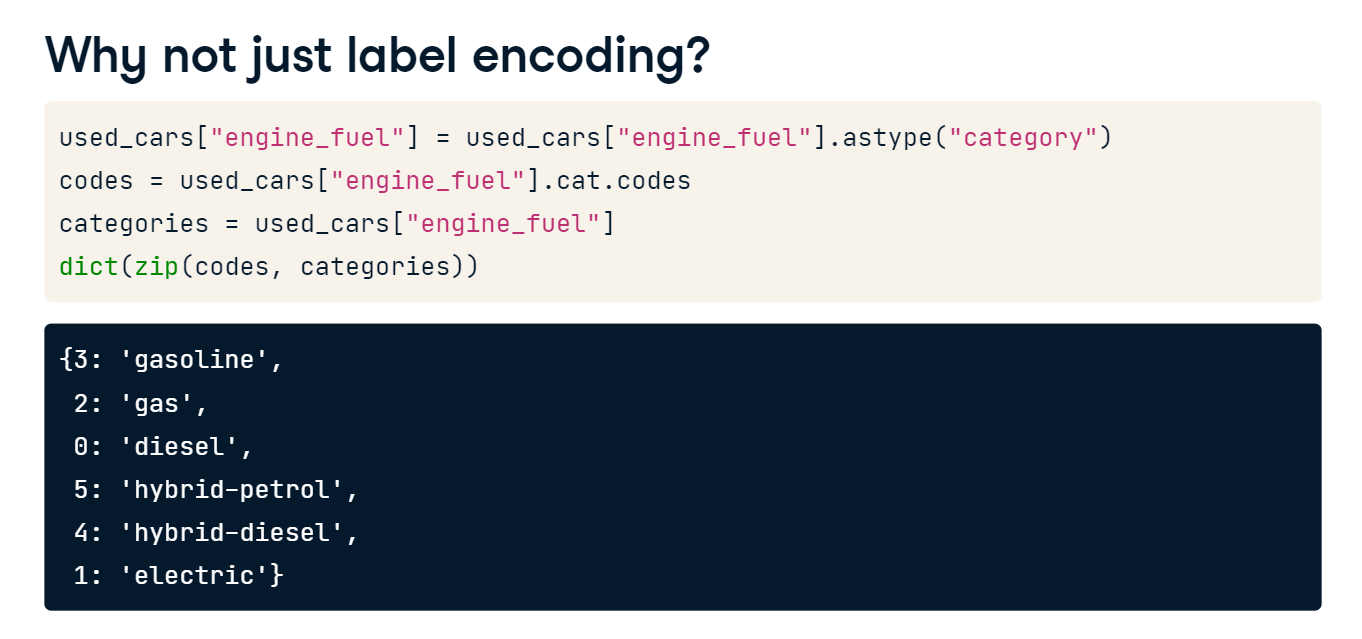